# <6주차 MLstudy 강의정리 및 코드실습>

## Lab 10-1 Relu activation function

● Problem of Sigmoid

-기존의 뉴럴네크워크에서 더 깊은 네트워크를 사용하면서 sigmoid함수의 gradient가 점점 소멸되어가는 vanishing gradient가 발생하는 것을 막기 위하여 Relu를 사용한다.

● Why Relu ?

-간단하면서도 좋은 성능향상을 가진다.

● Code
    
    ○ load dataset
    ○ create network
    ○ define loss function
    ○ experiments
        - parameters
        - model
        - eager mode

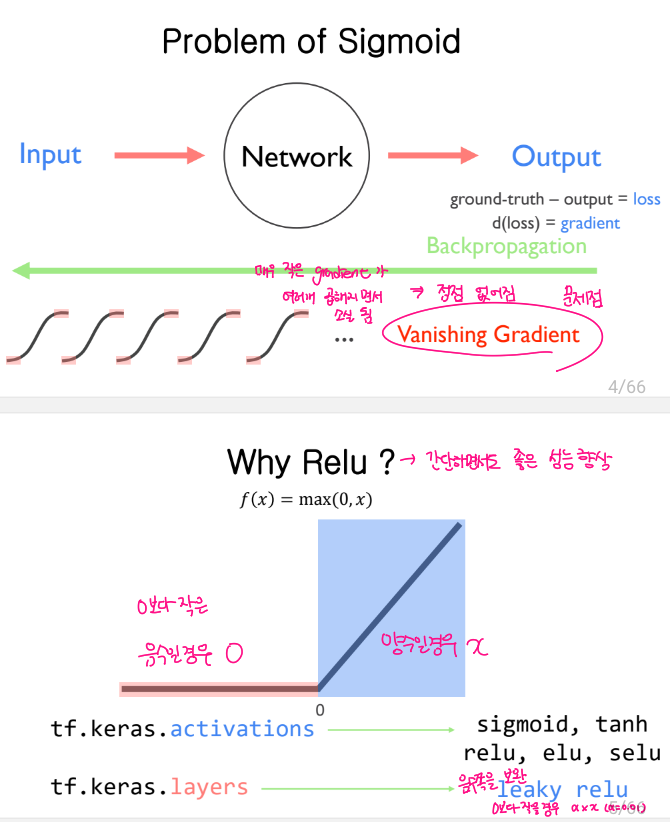

## Lab 10-2 Weight Initialization

● Xavier Initialization (Glorot Initialization) 자비어 초기화
- weight 초기화로 많이 사용

● He Initialization for Relu
- Relu에 특화된 weight 초기화 기법

● Code
    
    ○ load dataset: mnist 부르기 (위의 Relu때와 같은 코드)
    ○ create network: flatten, dense, relu 사용 (RandomNormal() --> 자비어는 glorot_uniform(),he는 he_uniform())
    ○ define loss function (위의 Relu때와 같은 코드)
    ○ experiments (위의 Relu때와 같은 코드)
        - parameters
        - model
        - eager mode: 자비어 초기화를 사용함으로써 출발지점을 좋게 하여 성능향상이 된다.

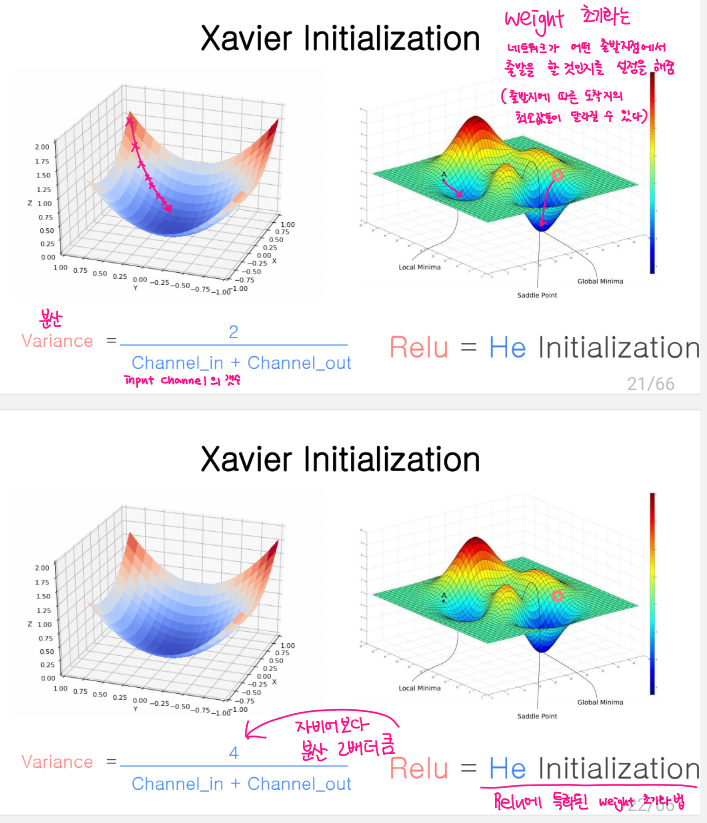

## Lab 10-3 Dropout

● Dropout이란?
- under fitting, over fitting을 예방하기 위함
- 각각의 뉴런들 중 몇개의 일부분을 끄고 학습

● Code
    
    ○ load dataset: mnist 부르기 (위의 Relu때와 같은 코드)
    ○ create network: flatten, dense, relu, dorpout(rate)가 추가됨. 몇 % 비율로 노드(뉴런)을 끌 것인지 정함
    ○ define loss function (위의 Relu때와 같은 코드) + training=True를 이용하여 dropout을 사용함
    ○ experiments (위의 Relu때와 같은 코드)
        - parameters
        - model
        - eager mode

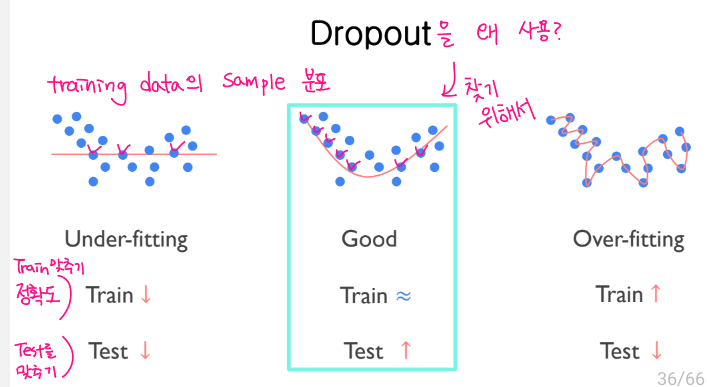
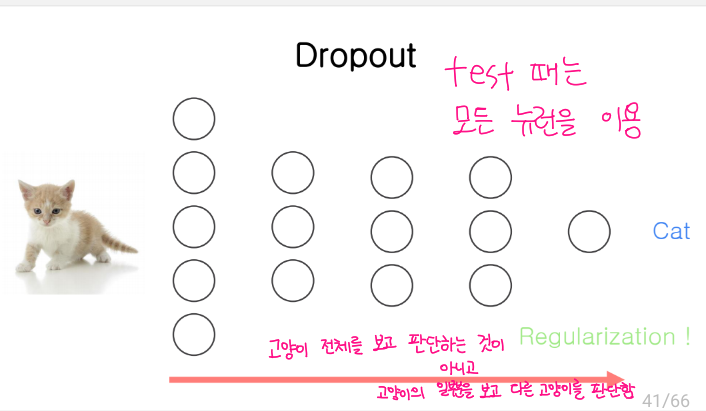

## Lab 10-4 Batch Normalization

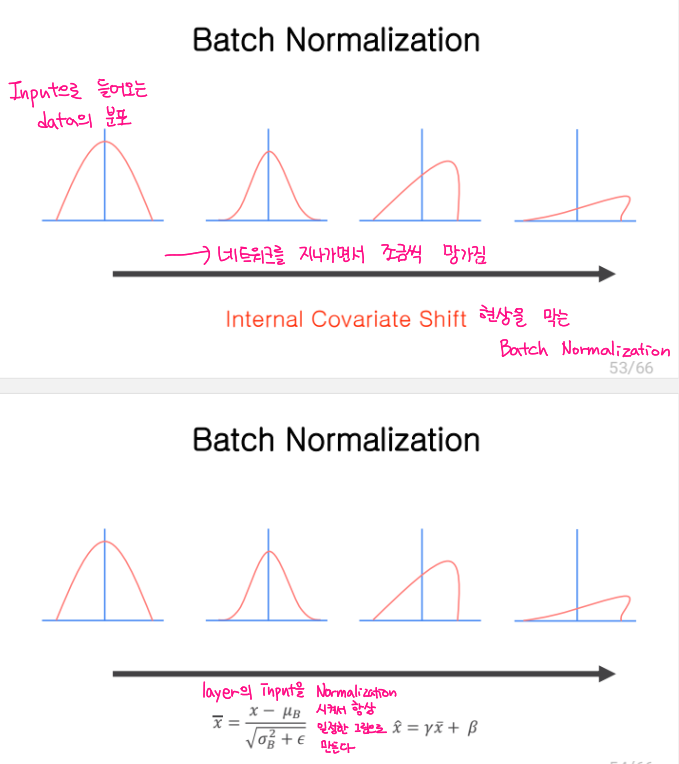
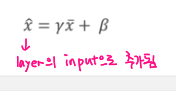

In [8]:
import tensorflow.compat.v1 as tf # contrib 왜 안돼요우.....ㅡㅠㅜㅡㅜㅡ,ㅜㅡ,ㅠㅜㅡ,ㅜㅡㅠ,미치겟오요우

ERROR! Session/line number was not unique in database. History logging moved to new session 150


In [9]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from time import time
import os
print(tf.__version__)

2.0.0


In [10]:
def load(model, checkpoint_dir):
    print(" [*] Reading checkpoints...")

    ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
    if ckpt :
        ckpt_name = os.path.basename(ckpt.model_checkpoint_path)
        checkpoint = tf.train.Checkpoint(dnn=model)
        checkpoint.restore(save_path=os.path.join(checkpoint_dir, ckpt_name))
        counter = int(ckpt_name.split('-')[1])
        print(" [*] Success to read {}".format(ckpt_name))
        return True, counter
    else:
        print(" [*] Failed to find a checkpoint")
        return False, 0

def check_folder(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)
    return dir

In [11]:
def load_mnist() :
    (train_data, train_labels), (test_data, test_labels) = mnist.load_data()
    train_data = np.expand_dims(train_data, axis=-1) # [N, 28, 28] -> [N, 28, 28, 1]
    test_data = np.expand_dims(test_data, axis=-1) # [N, 28, 28] -> [N, 28, 28, 1]

    train_data, test_data = normalize(train_data, test_data)

    train_labels = to_categorical(train_labels, 10) # [N,] -> [N, 10]
    test_labels = to_categorical(test_labels, 10) # [N,] -> [N, 10]

    return train_data, train_labels, test_data, test_labels

def normalize(train_data, test_data):
    train_data = train_data.astype(np.float32) / 255.0
    test_data = test_data.astype(np.float32) / 255.0

    return train_data, test_data


In [12]:
def flatten() :
    return tf.keras.layers.Flatten()

def dense(label_dim, weight_init) :
    return tf.keras.layers.Dense(units=label_dim, use_bias=True, kernel_initializer=weight_init)

def relu() :
    return tf.keras.layers.Activation(tf.keras.activations.relu)

In [13]:
class create_model_class(tf.keras.Model):
    def __init__(self, label_dim):
        super(create_model_class, self).__init__()
        weight_init = tf.keras.initializers.RandomNormal()

        self.model = tf.keras.Sequential()
        self.model.add(flatten())

        for i in range(2):
            self.model.add(dense(256, weight_init))
            self.model.add(relu())

        self.model.add(dense(label_dim, weight_init))

    def call(self, x, training=None, mask=None):
        x = self.model(x)

        return x

In [14]:
""" dataset """
train_x, train_y, test_x, test_y = load_mnist()

""" parameters """
learning_rate = 0.001
batch_size = 128

training_epochs = 1
training_iterations = len(train_x) // batch_size

label_dim = 10

train_flag = True

""" Graph Input using Dataset API """
train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=batch_size).\
    batch(batch_size,drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=len(test_x)).\
    batch(len(test_x))

In [ ]:
""" Model """
network = create_model_function(label_dim)

""" Training """
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

""" Writer """
checkpoint_dir = 'checkpoints'
logs_dir = 'logs'

model_dir = 'nn_softmax'

checkpoint_dir = os.path.join(checkpoint_dir, model_dir)
check_folder(checkpoint_dir)
checkpoint_prefix = os.path.join(checkpoint_dir, model_dir)
logs_dir = os.path.join(logs_dir, model_dir)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ERROR! Session/line number was not unique in database. History logging moved to new session 149
Traceback (most recent call last):
  File "C:\Users\ldy51\miniconda3\envs\MLstudy\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ldy51\AppData\Local\Temp\ipykernel_8492\1813289670.py", line 2, in <module>
    network = create_model_function(label_dim)
NameError: name 'create_model_function' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ldy51\miniconda3\envs\MLstudy\lib\site-packages\IPython\core\interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ldy51\miniconda3\envs\MLstudy\li

In [ ]:
if train_flag :

    checkpoint = tf.train.Checkpoint(dnn=network)

    # create writer for tensorboard
    summary_writer = tf.contrib.summary.create_file_writer(logdir=logs_dir)
    start_time = time()

    # restore check-point if it exits
    could_load, checkpoint_counter = load(network, checkpoint_dir)
    global_step = tf.train.create_global_step()

    if could_load:
        start_epoch = (int)(checkpoint_counter / training_iterations)
        start_iteration = checkpoint_counter - start_epoch * training_iterations
        counter = checkpoint_counter
        global_step.assign(checkpoint_counter)
        print(" [*] Load SUCCESS")
    else:
        start_epoch = 0
        start_iteration = 0
        counter = 0
        print(" [!] Load failed...")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\ldy51\miniconda3\envs\MLstudy\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ldy51\AppData\Local\Temp\ipykernel_49312\2836195651.py", line 6, in <module>
    summary_writer = tf.contrib.summary.create_file_writer(logdir=logs_dir)
AttributeError: module 'tensorflow' has no attribute 'contrib'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ldy51\miniconda3\envs\MLstudy\lib\site-packages\IPython\core\interactiveshell.py", line 2077, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ldy51\miniconda3\envs\MLstudy\lib\site-packages\IPython\core\ultratb.py", line 1101, 